## Data Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/shusunny/dataTools/master/toyota.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [ ]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f901c7eb350>,
      dtype=object)

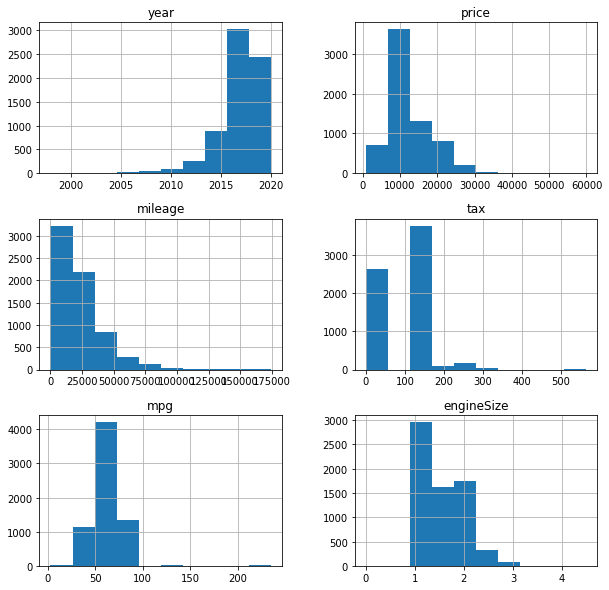

In [ ]:
# Numerical data hist map. 
data_column_names = list(data.columns)
data_mean = pd.DataFrame(data, columns = data_column_names)
data_mean.hist(figsize=(10,10))

## Data processing

In [ ]:
# Transform category data
data.model=data.model.astype('category')
data['Model']=data.model.cat.codes
data.drop('model', axis=1, inplace=True)

In [ ]:
data.year=data.year.astype('category')
data['Year']=data.year.cat.codes
data.drop('year', axis=1, inplace=True)

In [ ]:
data.transmission=data.transmission.astype('category')
data['Trans']=data.transmission.cat.codes
data.drop('transmission', axis=1, inplace=True)

In [ ]:
data.fuelType=data.fuelType.astype('category')
data['Fuel']=data.fuelType.cat.codes
data.drop('fuelType', axis=1, inplace=True)

In [ ]:
data.head()

,price,mileage,tax,mpg,engineSize,Model,Year,Trans,Fuel
0,16000,24089,265,36.2,2.0,6,18,1,3
1,15995,18615,145,36.2,2.0,6,19,1,3
2,13998,27469,265,36.2,2.0,6,17,1,3
3,18998,14736,150,36.2,2.0,6,19,1,3
4,17498,36284,145,36.2,2.0,6,19,1,3


In [ ]:
# data split and scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data_train, data_test= train_test_split(data, test_size=0.2, random_state=100)

In [ ]:
data_train.head()

,price,mileage,tax,mpg,engineSize,Model,Year,Trans,Fuel
3198,16791,29201,0,72.4,1.8,0,19,0,1
2935,12250,50920,0,76.4,1.8,0,17,0,1
4512,6950,43298,0,69.0,1.0,2,18,1,3
1348,10990,12012,145,47.9,1.5,17,21,1,3
1664,7600,70167,145,58.9,1.5,17,20,1,3


In [ ]:
# Standard scale
std = StandardScaler()
X_train = std.fit_transform(data_train)
X_train = pd.DataFrame(X_train, columns = data_train.columns)
X_train.head()

,price,mileage,tax,mpg,engineSize,Model,Year,Trans,Fuel
0,0.681553,0.330222,-1.279468,0.580143,0.755606,-1.168929,0.116353,-1.022095,-1.057166
1,-0.039616,1.467644,-1.279468,0.828314,0.755606,-1.168929,-0.777010,-1.022095,-1.057166
2,-0.881324,1.068480,-1.279468,0.369197,-1.082573,-0.880331,-0.330329,0.470479,0.777684
3,-0.239720,-0.569965,0.676384,-0.939909,0.066289,1.284154,1.009715,0.470479,0.777684
4,-0.778095,2.475608,0.676384,-0.257437,0.066289,1.284154,0.563034,0.470479,0.777684


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f900ce752d0>,
      dtype=object)

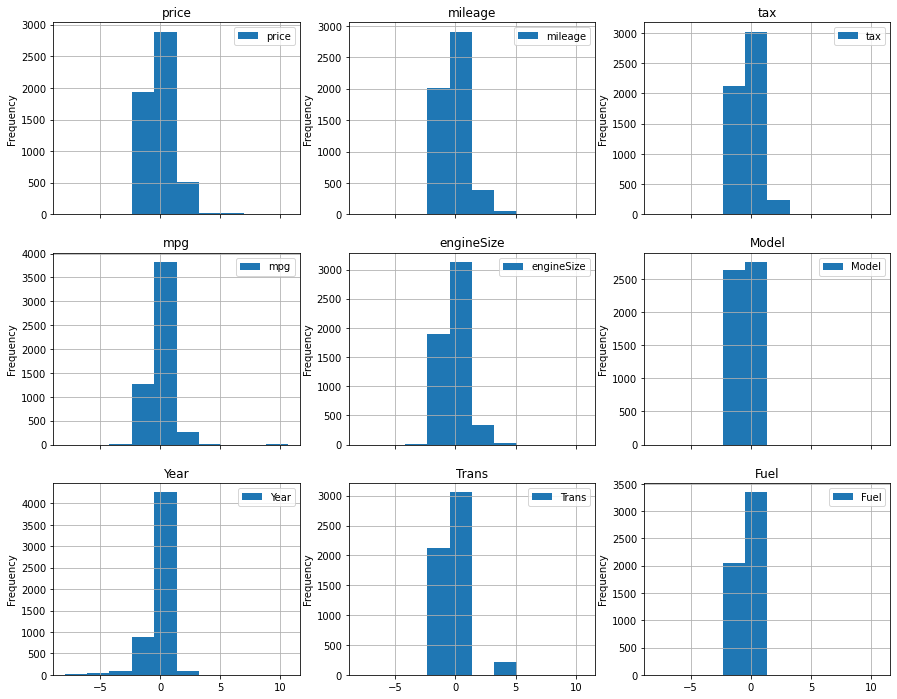

In [ ]:
#histogram for all numneric features
X_train.plot(kind = 'hist' , subplots = True, color ='#1f77b4', layout = (3,3), figsize = (15, 12), grid =True, title = ['price', 'mileage', 'tax', 'mpg', 'engineSize', 'Model', 'Year',
       'Trans', 'Fuel'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f900cbe2b10>,
      dtype=object)

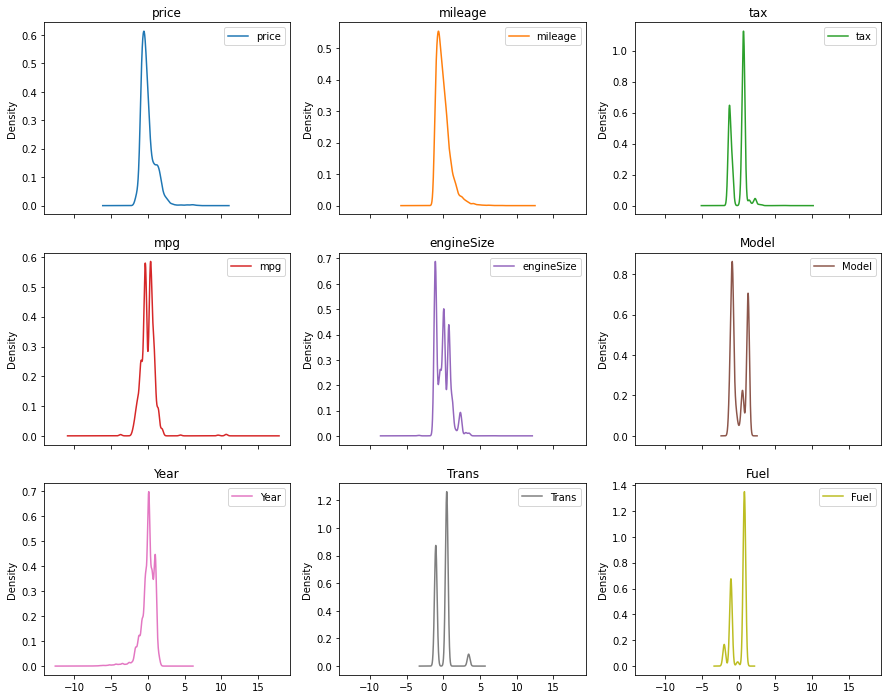

In [ ]:
#kde for standard scaler
X_train.plot(kind = 'kde' , subplots = True, layout = (3,3), figsize = (15, 12), title = ['price', 'mileage', 'tax', 'mpg', 'engineSize', 'Model', 'Year',
       'Trans', 'Fuel'])

In [ ]:
y_train= X_train.pop('price')

In [ ]:
# process test data with same scale
X_test = std.transform(data_test)
X_test = pd.DataFrame(X_test, columns = data_test.columns)
X_test.head()

,price,mileage,tax,mpg,engineSize,Model,Year,Trans,Fuel
0,-0.317538,-0.728384,-0.874809,-0.499404,-0.393256,1.284154,0.116353,0.470479,0.777684
1,-0.079636,0.736612,0.676384,-0.989543,0.755606,-1.024630,0.116353,0.470479,0.777684
2,-0.913086,0.143680,0.676384,0.369197,-1.082573,-0.880331,0.116353,0.470479,0.777684
3,0.365357,0.580969,0.946156,-1.212898,0.755606,0.995556,0.116353,-1.022095,-0.139741
4,-0.239720,-0.110314,0.676384,-0.406340,0.066289,1.284154,0.563034,0.470479,0.777684


In [ ]:
y_test= X_test.pop('price')

In [ ]:
size={
    "X_test": X_test.shape,
    "X_train": X_train.shape,
    "y_test": y_test.shape,
    "y_train": y_train.shape
}
print(size)

{'X_test': (1348, 8), 'X_train': (5390, 8), 'y_test': (1348,), 'y_train': (5390,)}


## Feature Selection

In [ ]:
# run linear model to select best k features
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
import seaborn as sns

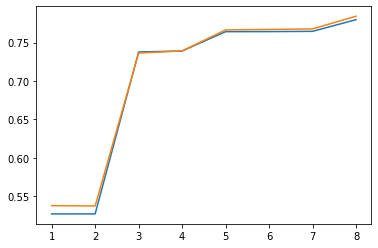

In [ ]:
no_of_features = []
r_squared_train = []
r_squared_test = []

# We iterate all number of features
for k in range(1, 9):
    selector = SelectKBest(f_regression, k = k)
    
    # Our transformed sets with the k-best features
    X_train_transformed = selector.fit_transform(X_train, y_train)
    X_test_transformed = selector.transform(X_test)

    # We train a basic regression model on those transformed sets
    regressor = LinearRegression()
    regressor.fit(X_train_transformed, y_train)

    no_of_features.append(k)
    r_squared_train.append(regressor.score(X_train_transformed, y_train))
    r_squared_test.append(regressor.score(X_test_transformed, y_test))
    
sns.lineplot(x = no_of_features, y = r_squared_train, legend = 'full')
sns.lineplot(x = no_of_features, y = r_squared_test, legend = 'full')

In [ ]:
for n_features in range(1, 9):
  index_reasonable= no_of_features.index(n_features)
  score= r_squared_test[index_reasonable]
  print("--",n_features, score)

-- 1 0.5377895706992724
-- 2 0.5374048168029788
-- 3 0.7363852824252307
-- 4 0.7391895741610132
-- 5 0.7665190311295926
-- 6 0.7671179153618125
-- 7 0.7678253892662897
-- 8 0.7843143929148155


From figure and data above, it seems selecting 5 best features is reasonable 

In [ ]:
selector = SelectKBest(f_regression, k = 5)

# Transformed sets
X_train_transformed = selector.fit_transform(X_train, y_train)
X_test_transformed = selector.transform(X_test)

# Names of best features
column_names = X_train.columns
kbest_features = list(column_names[selector.get_support()])
kbest_features

['mileage', 'engineSize', 'Year', 'Trans', 'Fuel']

## Models

In [ ]:
## Model building
Results=pd.DataFrame(index=['MSE','R2'])

In [ ]:
# Linear
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as MSE 
from sklearn.metrics import r2_score as r2

In [ ]:
linear = linear_model.LinearRegression()
linear.fit(X_train, y_train) 
linear.score(X_test, y_test)

0.7843143929148155

In [ ]:
y_pred = linear.predict(X_test) 
Results['Linear'] = [np.sqrt(MSE(y_test, y_pred)), r2(y_test, y_pred)]
Results

,Linear
MSE,0.481734
R2,0.784314


In [ ]:
# BayesianRidge
from sklearn.linear_model import BayesianRidge

In [ ]:
ridge = BayesianRidge(compute_score=True)
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.7842386026569846

In [ ]:
y_pred = ridge.predict(X_test) 

Results['Bayesian'] = [np.sqrt(MSE(y_test, y_pred)), r2(y_test, y_pred)]
Results

,Linear,Bayesian
MSE,0.481734,0.481819
R2,0.784314,0.784239


In [ ]:
#SVR
from sklearn.svm import SVR

In [ ]:
svr = SVR(kernel="rbf")
svr.fit(X_train, y_train)
svr.score

<bound method RegressorMixin.score of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)>

In [ ]:
y_pred = svr.predict(X_test) 

Results['SVR'] = [np.sqrt(MSE(y_test, y_pred)), r2(y_test, y_pred)]
Results

,Linear,Bayesian,SVR
MSE,0.481734,0.481819,0.249666
R2,0.784314,0.784239,0.942067


In [ ]:
# DecisionTree
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)
dtree.score

<bound method RegressorMixin.score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')>

In [ ]:
y_pred = dtree.predict(X_test) 

Results['DicisionTree'] = [np.sqrt(MSE(y_test, y_pred)), r2(y_test, y_pred)]
Results

,Linear,Bayesian,SVR,DicisionTree
MSE,0.481734,0.481819,0.249666,0.262555
R2,0.784314,0.784239,0.942067,0.935931


In [ ]:
# RandomForest
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest = RandomForestRegressor(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
forest.score

<bound method RegressorMixin.score of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)>

In [ ]:
y_pred_f = forest.predict(X_test) 

Results['RandomForest'] = [np.sqrt(MSE(y_test, y_pred_f)), r2(y_test, y_pred_f)]
Results

,Linear,Bayesian,SVR,DicisionTree,RandomForest
MSE,0.481734,0.481819,0.249666,0.262555,0.208505
R2,0.784314,0.784239,0.942067,0.935931,0.959595


In [ ]:
# NN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
model = Sequential()

model.add(Dense(38,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test),
          callbacks=[early_stop]
          )

Epoch 1/600
169/169 [==============================] - 1s 4ms/step - loss: 1.1460 - val_loss: 0.3340
Epoch 2/600
169/169 [==============================] - 0s 2ms/step - loss: 0.4527 - val_loss: 0.2294
Epoch 3/600
169/169 [==============================] - 0s 1ms/step - loss: 0.3476 - val_loss: 0.1964
Epoch 4/600
169/169 [==============================] - 0s 2ms/step - loss: 0.2374 - val_loss: 0.1696
Epoch 5/600
169/169 [==============================] - 0s 2ms/step - loss: 0.2506 - val_loss: 0.1698
Epoch 6/600
169/169 [==============================] - 0s 2ms/step - loss: 0.2621 - val_loss: 0.1489
Epoch 7/600
169/169 [==============================] - 0s 2ms/step - loss: 0.2415 - val_loss: 0.1477
Epoch 8/600
169/169 [==============================] - 0s 2ms/step - loss: 0.2286 - val_loss: 0.1359
Epoch 9/600
169/169 [==============================] - 0s 1ms/step - loss: 0.1961 - val_loss: 0.1366
Epoch 10/600
169/169 [==============================] - 0s 2ms/step - loss: 0.1961 - val_lo

In [ ]:
y_pred = dtree.predict(X_test) 

Results['NeuralNets'] = [np.sqrt(MSE(y_test, y_pred)), r2(y_test, y_pred)]
Results

,Linear,Bayesian,SVR,DicisionTree,RandomForest,NeuralNets
MSE,0.481734,0.481819,0.249666,0.262555,0.208505,0.262555
R2,0.784314,0.784239,0.942067,0.935931,0.959595,0.935931


Random Forest shows a winner here.

## Evaluation

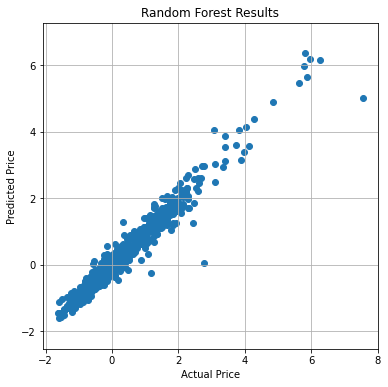

In [ ]:
# Model result from Random Forest
fig = plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_f)
plt.title('Random Forest Results')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.axis('equal')
plt.grid()
plt.show()

In [ ]:
data_ori = X_test
data_ori.insert(loc=0, column='price', value=y_test)

In [ ]:
data_ori

,price,mileage,tax,mpg,engineSize,Model,Year,Trans,Fuel
0,-0.317538,-0.728384,-0.874809,-0.499404,-0.393256,1.284154,0.116353,0.470479,0.777684
1,-0.079636,0.736612,0.676384,-0.989543,0.755606,-1.024630,0.116353,0.470479,0.777684
2,-0.913086,0.143680,0.676384,0.369197,-1.082573,-0.880331,0.116353,0.470479,0.777684
3,0.365357,0.580969,0.946156,-1.212898,0.755606,0.995556,0.116353,-1.022095,-0.139741
4,-0.239720,-0.110314,0.676384,-0.406340,0.066289,1.284154,0.563034,0.470479,0.777684
...,...,...,...,...,...,...,...,...,...
1343,0.077906,-0.931369,0.676384,-0.939909,0.066289,1.284154,1.009715,0.470479,0.777684
1344,-0.381063,0.728128,-1.279468,0.927583,0.066289,1.284154,-0.777010,-1.022095,-1.057166
1345,-0.715047,-0.376720,0.676384,0.362992,-1.082573,-0.880331,0.563034,0.470479,0.777684
1346,-0.000707,0.146822,-1.279468,1.095099,0.755606,-1.168929,-0.777010,-1.022095,-1.057166


In [ ]:
data_original = std.inverse_transform(data_ori)
data_original = pd.DataFrame(data_original, columns = data_ori.columns)
data_original.head()

,price,mileage,tax,mpg,engineSize,Model,Year,Trans,Fuel
0,10500.0,8987.0,30.0,55.0,1.3,17.0,19.0,1.0,3.0
1,11998.0,36961.0,145.0,47.1,1.8,1.0,19.0,1.0,3.0
2,6750.0,25639.0,145.0,69.0,1.0,2.0,19.0,1.0,3.0
3,14800.0,33989.0,165.0,43.5,1.8,15.0,19.0,0.0,2.0
4,10990.0,20789.0,145.0,56.5,1.5,17.0,20.0,1.0,3.0


In [ ]:
data_pred = X_test
data_pred['price']=y_pred_f

In [ ]:
data_pred = std.inverse_transform(data_pred)
data_pred = pd.DataFrame(data_pred, columns = data_ori.columns)
data_pred.head()

,price,mileage,tax,mpg,engineSize,Model,Year,Trans,Fuel
0,10617.473000,8987.0,30.0,55.0,1.3,17.0,19.0,1.0,3.0
1,12832.481750,36961.0,145.0,47.1,1.8,1.0,19.0,1.0,3.0
2,6634.552000,25639.0,145.0,69.0,1.0,2.0,19.0,1.0,3.0
3,15924.835111,33989.0,165.0,43.5,1.8,15.0,19.0,0.0,2.0
4,10164.396583,20789.0,145.0,56.5,1.5,17.0,20.0,1.0,3.0


In [ ]:
result1 = pd.DataFrame({'Actual Price': data_original['price'], 'Predicted Price': data_pred['price']})
result1['Error'] = abs(result1['Predicted Price'] - result1['Actual Price'])
result1.describe()

,Actual Price,Predicted Price,Error
count,1348.000000,1348.000000,1348.000000
mean,12614.126113,12559.952109,803.887035
std,6533.896591,6339.294600,1038.393187
min,2300.000000,2354.220000,0.368333
25%,8397.250000,8334.846000,236.794063
50%,10800.000000,10861.750000,547.720985
75%,14799.250000,14648.292083,1038.518542
max,59995.000000,52515.530000,17188.210000


In [ ]:
result1.head(30)

,Actual Price,Predicted Price,Error
0,10500.0,10617.473000,117.473000
1,11998.0,12832.481750,834.481750
2,6750.0,6634.552000,115.448000
3,14800.0,15924.835111,1124.835111
4,10990.0,10164.396583,825.603417
5,14495.0,13357.632333,1137.367667
6,10495.0,11592.080000,1097.080000
7,11499.0,15948.320000,4449.320000
8,7901.0,8677.370000,776.370000
9,12199.0,13501.612833,1302.612833


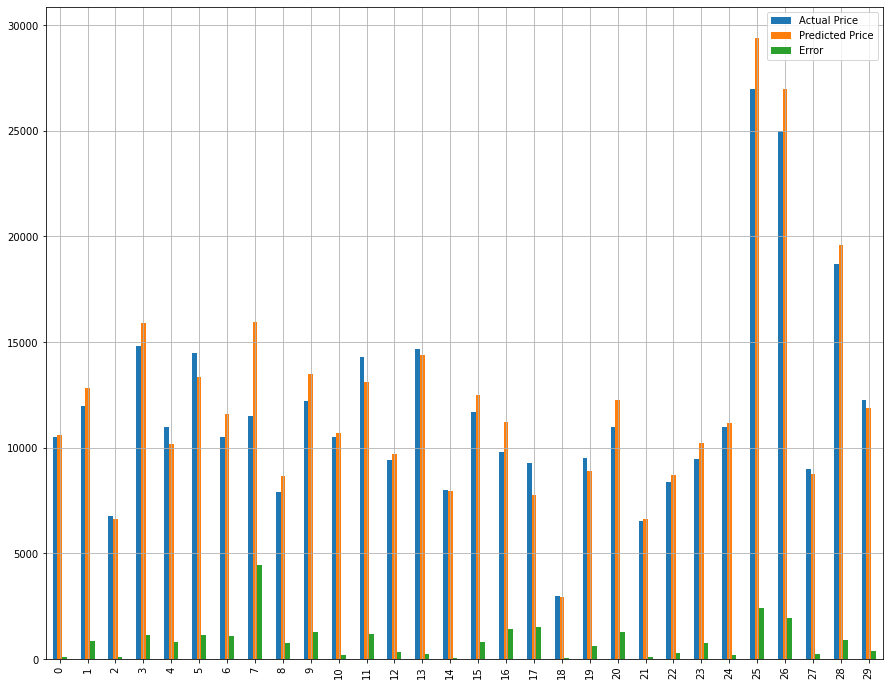

In [ ]:
compare = result1.head(30)
compare.plot(kind = 'bar', figsize=(12,10), grid=True)